In [1]:
# code based on: https://github.com/AdityaLab/EpiFNP/blob/master/test_ili.py

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)

In [3]:
%ls /TimeseriesDatasets/forecasting/epidemic/ILI-US/

ILINet.csv  ILINet_states.csv


In [4]:
DATASET_FILENAME = '/TimeseriesDatasets/forecasting/epidemic/ILI-US/ILINet.csv'
OUTPUT_DIR = '/TimeseriesDatasets/forecasting/epidemic/preprocessed/'

In [5]:
df = pd.read_csv(DATASET_FILENAME)
df = df[["REGION", "YEAR", "WEEK", "% WEIGHTED ILI"]]
df = df[(df["YEAR"] >= 2004) | ((df["YEAR"] == 2003) & (df["WEEK"] >= 20))]
print(len(df))
df.head()

9922


,REGION,YEAR,WEEK,% WEIGHTED ILI
293,X,2003,20,0.727705
294,X,2003,21,0.717701
295,X,2003,22,0.789394
296,X,2003,23,0.722129
297,X,2003,24,0.591326


ILI-US_X_2003-2020.csv
  REGION  YEAR  WEEK  % WEIGHTED ILI
0      X  2003    20        0.727705
1      X  2003    21        0.717701
2      X  2003    22        0.789394
3      X  2003    23        0.722129
4      X  2003    24        0.591326


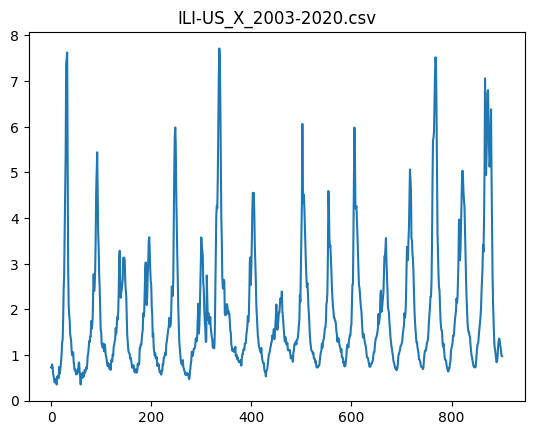

ILI-US_Region_1_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 1  2003    20        0.199502
1  Region 1  2003    21        0.120850
2  Region 1  2003    22        0.110875
3  Region 1  2003    23        0.046356
4  Region 1  2003    24        0.161722


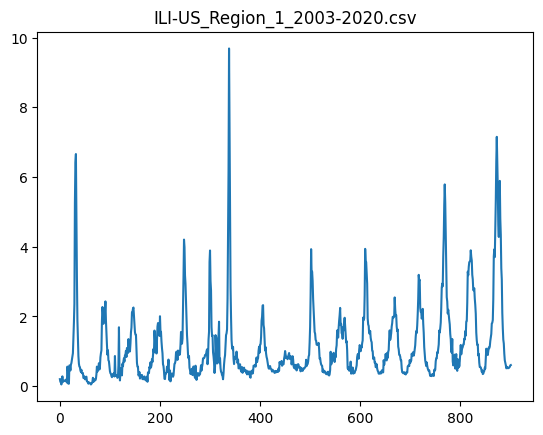

ILI-US_Region_2_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 2  2003    20         1.84902
1  Region 2  2003    21         1.54603
2  Region 2  2003    22         2.61157
3  Region 2  2003    23         1.35671
4  Region 2  2003    24         1.41652


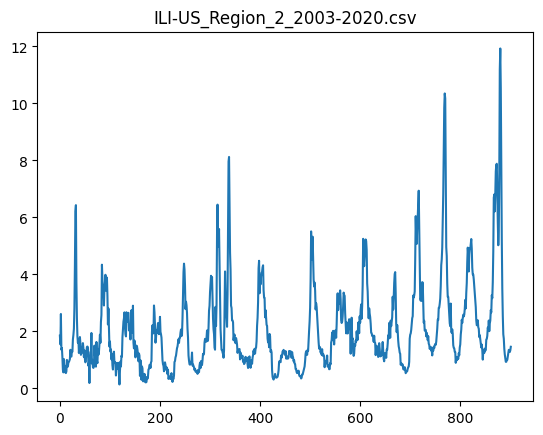

ILI-US_Region_3_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 3  2003    20        1.303890
1  Region 3  2003    21        0.988692
2  Region 3  2003    22        0.956930
3  Region 3  2003    23        0.895632
4  Region 3  2003    24        1.180250


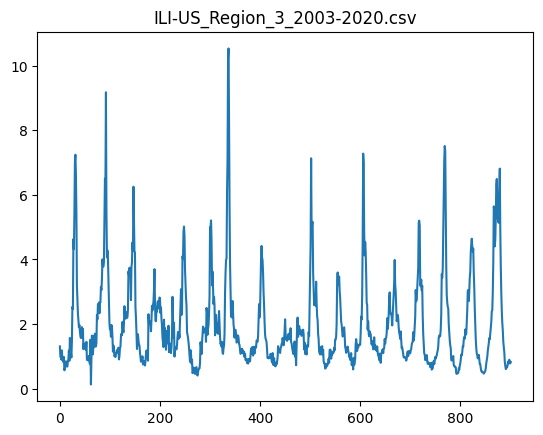

ILI-US_Region_4_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 4  2003    20        0.420990
1  Region 4  2003    21        0.795601
2  Region 4  2003    22        0.476614
3  Region 4  2003    23        0.394769
4  Region 4  2003    24        0.522053


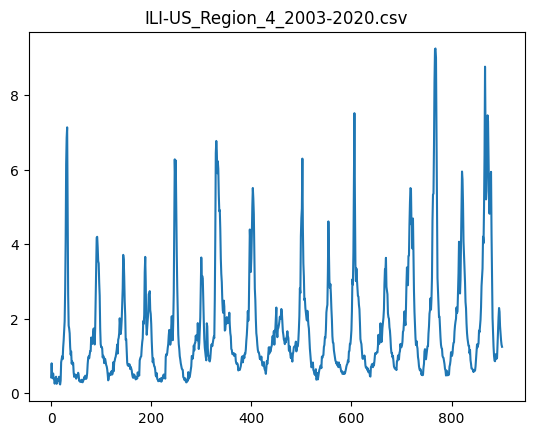

ILI-US_Region_5_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 5  2003    20        0.459533
1  Region 5  2003    21        0.296985
2  Region 5  2003    22        0.319755
3  Region 5  2003    23        0.320656
4  Region 5  2003    24        0.248534


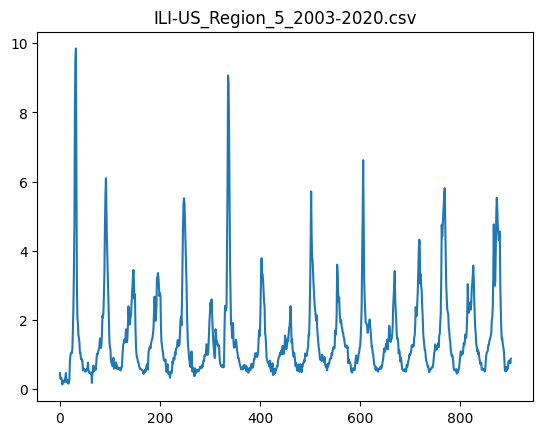

ILI-US_Region_6_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 6  2003    20        0.398766
1  Region 6  2003    21        1.143520
2  Region 6  2003    22        1.152870
3  Region 6  2003    23        0.824802
4  Region 6  2003    24        0.701011


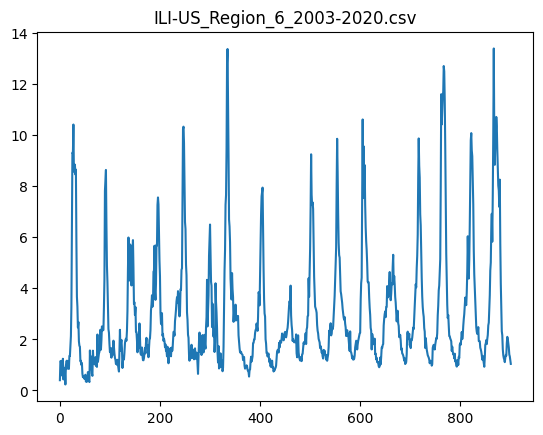

ILI-US_Region_7_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 7  2003    20        0.878384
1  Region 7  2003    21        0.453362
2  Region 7  2003    22        0.878040
3  Region 7  2003    23        0.681625
4  Region 7  2003    24        0.499815


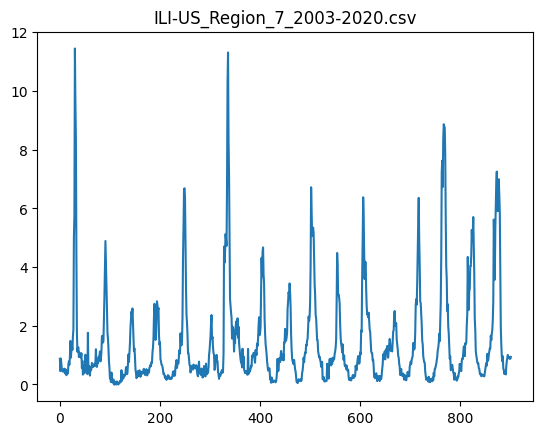

ILI-US_Region_8_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 8  2003    20        0.081914
1  Region 8  2003    21        0.023615
2  Region 8  2003    22        0.035840
3  Region 8  2003    23        0.120850
4  Region 8  2003    24        0.000000


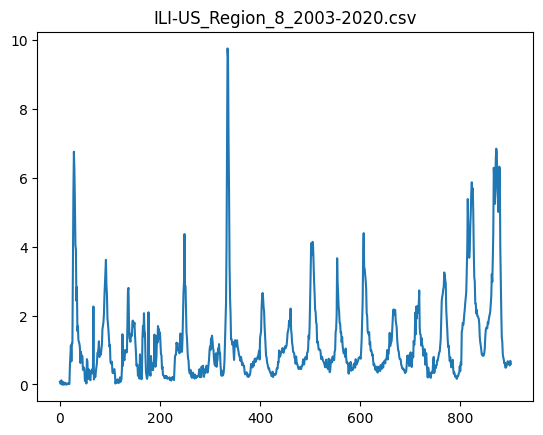

ILI-US_Region_9_2003-2020.csv
     REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 9  2003    20        0.901108
1  Region 9  2003    21        0.616252
2  Region 9  2003    22        0.599520
3  Region 9  2003    23        1.407980
4  Region 9  2003    24        0.444388


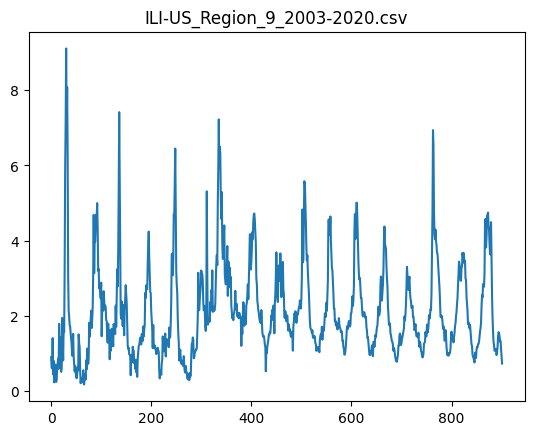

ILI-US_Region_10_2003-2020.csv
      REGION  YEAR  WEEK  % WEIGHTED ILI
0  Region 10  2003    20        0.276258
1  Region 10  2003    21        0.582949
2  Region 10  2003    22        0.642858
3  Region 10  2003    23        0.433505
4  Region 10  2003    24        0.221932


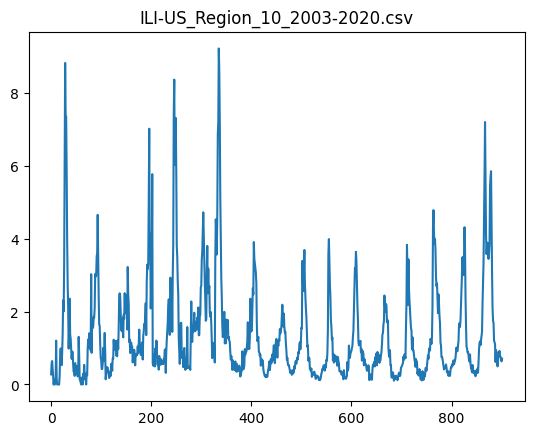

In [6]:
unique_regions = df['REGION'].unique()

for region in unique_regions:
    df_region = df[df['REGION'] == region]
    df_region = df_region.sort_values(by=['YEAR', 'WEEK'])
    df_region = df_region.reset_index(drop=True)

    # only weekly variant
    dataset_name = f'ILI-US_{region.replace(" ", "_")}_2003-2020.csv'

    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
    df_region.to_csv(OUTPUT_DIR + dataset_name, index=False)

    print(dataset_name)
    print(df_region.head())
    plt.plot(df_region['% WEIGHTED ILI'])
    plt.title(dataset_name)
    plt.show()